# 미리 말씀드리는 결론
값이 커질수록 모델의 분산이 커짐 - 이분산성을 띠므로 모델이 적합하다고 보기 어려움 -> rent에 이상치도 제거하고 로그를 씌워서 다시 해보도록 하겠습니다...<br>
좀 더 처리한 데이터로 분석한 결과를 보고싶으시다면 이민기_ghquest_session5_modified_ver.ipynb를 봐주십시오...

# Session5 Quest
## 다중선형회귀
'manhattan' 데이터셋을 활용, 독립변수를 3개 선택하여 다중선형회귀모델을 만들어주세요

아래 내용을 포함하여 제출해주세요
* 다중선형회귀모델 생성
* 회귀식 (계수 및 상수 확인)
* 독립변수 선택 이유
* 모델 평가
* 다중공선성 문제 확인
* 잔차 분석


In [1]:
#맨허튼의 주택 임대료와 관련된 데이터

import pandas as pd
import numpy as np

df = pd.read_csv("manhattan.csv")
df.head()

,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough
0,1545,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,Manhattan
1,2472,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,Manhattan
2,2919,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,Manhattan
3,2790,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,Manhattan
4,3946,17500,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1,Soho,Manhattan


In [2]:
df.info()
#결측치 없음 확인 가능

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3539 entries, 0 to 3538
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rental_id         3539 non-null   int64  
 1   rent              3539 non-null   int64  
 2   bedrooms          3539 non-null   float64
 3   bathrooms         3539 non-null   int64  
 4   size_sqft         3539 non-null   int64  
 5   min_to_subway     3539 non-null   int64  
 6   floor             3539 non-null   float64
 7   building_age_yrs  3539 non-null   int64  
 8   no_fee            3539 non-null   int64  
 9   has_roofdeck      3539 non-null   int64  
 10  has_washer_dryer  3539 non-null   int64  
 11  has_doorman       3539 non-null   int64  
 12  has_elevator      3539 non-null   int64  
 13  has_dishwasher    3539 non-null   int64  
 14  has_patio         3539 non-null   int64  
 15  has_gym           3539 non-null   int64  
 16  neighborhood      3539 non-null   object 


## 데이터 셋 분리

In [61]:
#독립변수, 종속변수 설정 
#내가 집을 볼 때 가장 중요하게 여기는 size_sqft, min_to_subway, building_age_yrs가 rent에 미치는 영향을 알아보고 싶다.
#Train 데이터, Test 데이터 분리

#사이킷런 트레인셋 생성함수 임포트
from sklearn.model_selection import train_test_split

x = df[['size_sqft', 'min_to_subway', 'building_age_yrs']]

y = df[['rent']]


x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=1)
_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=1)


## 다중선형회귀 모델 생성

In [62]:
#사이킷런 선형회귀모델 생성함수 임포트
from sklearn.linear_model import LinearRegression

mlr = LinearRegression()
mlr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [63]:
#독립변수 입력 및 종속변수 출력 test
my_apartment = [[100, 2, 1]]
my_predict = mlr.predict(my_apartment)

print(my_predict)

[[967.66177447]]


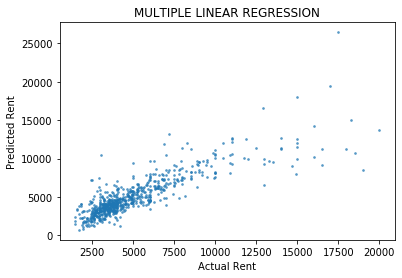

In [64]:
#Test 데이터의 예측값 저장 및 plotitng
import matplotlib.pyplot as plt

y_predict = mlr.predict(x_test)

plt.scatter(y_test, y_predict, alpha=0.6, s=3)
plt.xlabel("Actual Rent")
plt.ylabel("Predicted Rent")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.show()

## 회귀식 (계수 및 상수 확인)

In [65]:
# 회귀계수와 상수 확인
# y= b0 + b1*x1 + b2*x2 + ··· bn*xn + ε 에서 b값

print('회귀계수\n평수 size_sqft: ', mlr.coef_[0][0], ', 지하철까지 min_to_subway: ',mlr.coef_[0][1],', 건물 연식 building_age_yrs: ',mlr.coef_[0][2], sep='')
print('상수 값:', mlr.intercept_[0])

회귀계수
평수 size_sqft: 5.766724624809908, 지하철까지 min_to_subway: -18.32183721474884, 건물 연식 building_age_yrs: -11.84817286266936
상수 값: 439.4811592856822


# 모델 평가

In [66]:
#Mean square error, 결정계수(R-square) 구하기

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_predict)
r_squared = r2_score(y_test, y_predict)

print('MSE:{0:.3f}'.format(mse))
print('Variance score(R-square): {0:.3f}'.format(r_squared))

#R2스코어가 0.7 이상이니 적절한 모델이라고 평가할 수 있음

MSE:2355333.695
Variance score(R-square): 0.727


In [67]:
#변수의 개수를 고려하여 adjusted r-squared 구하기

adjusted_r_squared = 1 - (1-r_squared)*(len(y_train)-1)/(len(y_train)-x_train.shape[1]-1) #x_train.shape[1]: 독립변수의 개수
print('adjust_r_squared score: {0:.3f}'.format(adjusted_r_squared))

#adjusted R2 score도 0.7이상임을 확인할 수 있음

adjust_r_squared score: 0.727


## 다중공선성 문제 점검

In [68]:
#분산팽창계수 package 임포트
from statsmodels.stats.outliers_influence import variance_inflation_factor

#vif 데이터프레임에 x의 각 columns마다 분산팽창계수 구하기
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['features'] = x.columns

In [69]:
vif
#출력 및 확인, 다중공선성의 값이 10을 넘지 않으므로 회귀계수가 불안정하지는 않다고 해석할 수 있음

,VIF Factor,features
0,2.595034,size_sqft
1,1.594379,min_to_subway
2,2.044833,building_age_yrs


## 잔차 분석
#### - 모형의 선형성

#### 모든 예측값에서 잔차가 비슷하게 있어야 한다. <br> 빨간 실선이 점선에서 크게 벗어난다면 예측 값에 따라 잔차가 크게 달라진다는 것

In [70]:
#plot 작성을 위해 시본 라이브러리 임포트
import seaborn as sns

residual = y_test - y_predict

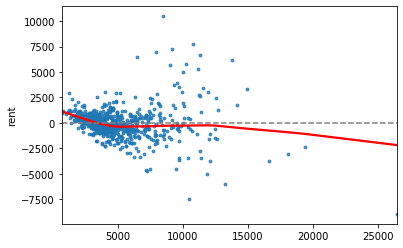

In [71]:
#y_predict의 차원을 1차원으로 변경
#residual은 Dataframe -> array 추출

sns.regplot(y_predict.flatten(), residual['rent'], lowess=True, line_kws={'color': 'red'}, scatter_kws={'s':8})
plt.plot([y_predict.min(), y_predict.max()], [0, 0], '--', color='grey')

#값이 커질수록 모델의 분산이 커짐 - 이분산성을 띠므로 모델이 적합하다고 보기 어려움 -> rent에 이상치도 지우고 로그를 씌워서 다시 해보도록 하겠습니다...

# 값이 커질수록 모델의 분산이 커짐 - 이분산성을 띠므로 모델이 적합하다고 보기 어려움 -> rent에 이상치도 지우고 로그를 씌워서 다시 해보도록 하겠습니다...